# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [247]:
%pip install matplotlib pandas numpy seaborn wordcloud

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


Số bài viết theo ngày trong tháng
Số bài viết đăng trong ngày
Số bài viết đăng theo giờ trong ngày
Số tương tác bài viết của một số sự kiện đặc biệt trong tháng, chiếm bao nhiêu tỉ trọng trong tháng
Sự tương quan giữa media và số lượng tương tác.
SỐ bài viết theo media


In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%run Clean_data.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        1000 non-null   int64  
 1   text                           1000 non-null   object 
 2   post_text                      1000 non-null   object 
 3   shared_text                    5 non-null      object 
 4   original_text                  0 non-null      float64
 5   time                           1000 non-null   object 
 6   timestamp                      1000 non-null   int64  
 7   image                          0 non-null      float64
 8   image_lowquality               1000 non-null   object 
 9   images                         0 non-null      float64
 10  images_description             0 non-null      float64
 11  images_lowquality              1000 non-null   object 
 12  images_lowquality_description  1000 non-null   ob

/tmp/ipykernel_201/3337443235.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['media'][i] = 2
/tmp/ipykernel_201/3337443235.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['media'][i] = 1
/tmp/ipykernel_201/3337443235.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['media'][i] = 2
/tmp/ipykernel_201/3337443235.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

<class 'pandas.core.frame.DataFrame'>
Index: 601 entries, 53 to 653
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        601 non-null    int64         
 1   text      601 non-null    object        
 2   time      601 non-null    datetime64[ns]
 3   comments  601 non-null    int64         
 4   shares    601 non-null    int64         
 5   reaction  601 non-null    int64         
 6   media     601 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 37.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 601 entries, 53 to 653
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        601 non-null    int64         
 1   text      601 non-null    object        
 2   time      601 non-null    datetime64[ns]
 3   comments  601 non-null    int64         
 4   shares    601 non-null    int64    

In [249]:
clean_df.describe()

id                           time      comments  \
count  6.010000e+02                            601    601.000000   
mean   6.774907e+14  2023-11-03 06:50:17.537437440    339.660566   
min    2.386491e+14            2023-10-19 07:31:42      0.000000   
25%    6.509102e+14            2023-10-26 12:26:15     17.000000   
50%    6.552014e+14            2023-11-02 21:30:35     40.000000   
75%    6.592852e+14            2023-11-10 20:05:49    150.000000   
max    7.201514e+15            2023-11-18 22:00:59  21000.000000   
std    3.061976e+14                            NaN   1365.359381   

             shares       reaction      media  
count    601.000000     601.000000  601.00000  
mean     209.923461    4822.382696    1.46589  
min        0.000000      91.000000    1.00000  
25%       13.000000     892.000000    1.00000  
50%       28.000000    2000.000000    1.00000  
75%       80.000000    5000.000000    2.00000  
max    17000.000000  104000.000000    3.00000  
std     1014.084211    9199.355346    0.51243

## Posts analysis

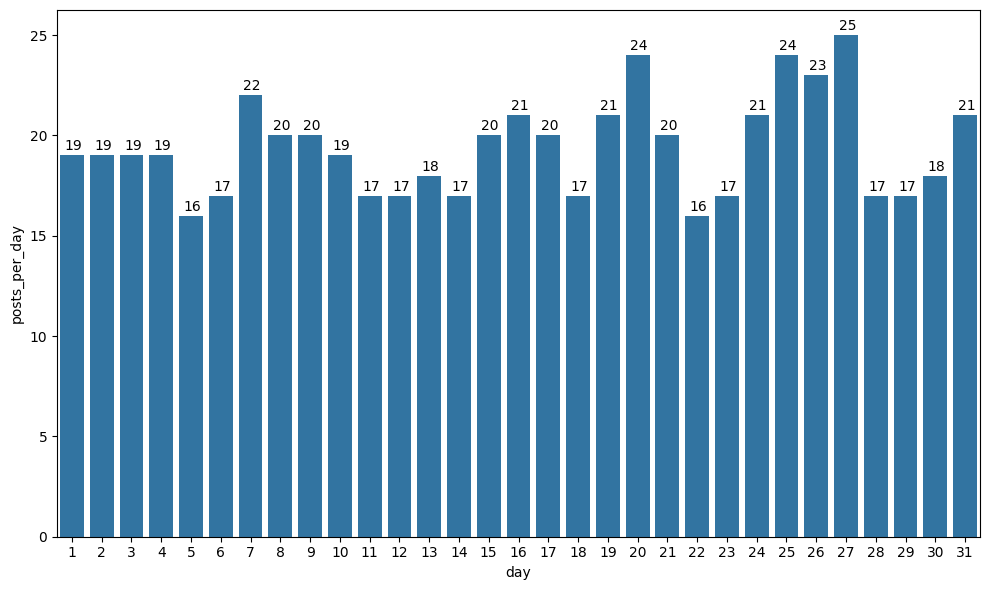

In [250]:
clean_df['day'] = clean_df['time'].dt.day
post_per_day = clean_df.groupby('day')['day'].count().reset_index(name='posts_per_day')
pd.DataFrame(post_per_day)
plt.figure(figsize=(10,6))
sns.barplot(data=post_per_day, x='day', y='posts_per_day')
# Chú thích giá trị của từng cột
for i in range(len(post_per_day)):
    plt.annotate(post_per_day['posts_per_day'].iloc[i], (post_per_day['day'].iloc[i] - 1.25, post_per_day['posts_per_day'].iloc[i]+0.25), color='black', fontsize=10)
plt.tight_layout()
plt.show()

In [251]:
post_per_day['posts_per_day'].mean()

19.387096774193548

In [252]:
post_per_day['posts_per_day'].median()

19.0

Text(18.5, 0.00012, 'Median: 19.00')

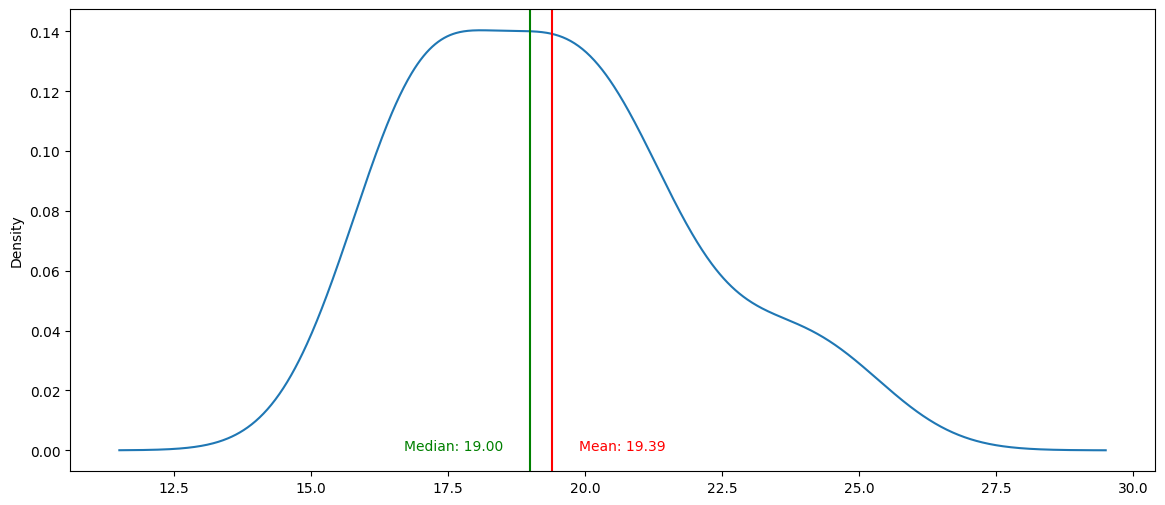

In [253]:
ax = post_per_day['posts_per_day'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(post_per_day['posts_per_day'].mean(), color='red')
ax.axvline(post_per_day['posts_per_day'].median(), color='green')
mean_label = f'Mean: {post_per_day["posts_per_day"].mean():.2f}'
median_label = f'Median: {post_per_day["posts_per_day"].median():.2f}'
ax.annotate(mean_label, 
             xy=(post_per_day['posts_per_day'].mean(), 0), 
             xytext=(post_per_day['posts_per_day'].mean() + 0.5, 0.00012),
             fontsize=10, color='red', ha='left')

ax.annotate(median_label, 
             xy=(post_per_day['posts_per_day'].median(), 0), 
             xytext=(post_per_day['posts_per_day'].median() - 0.5, 0.00012),
             fontsize=10, color='green', ha='right')

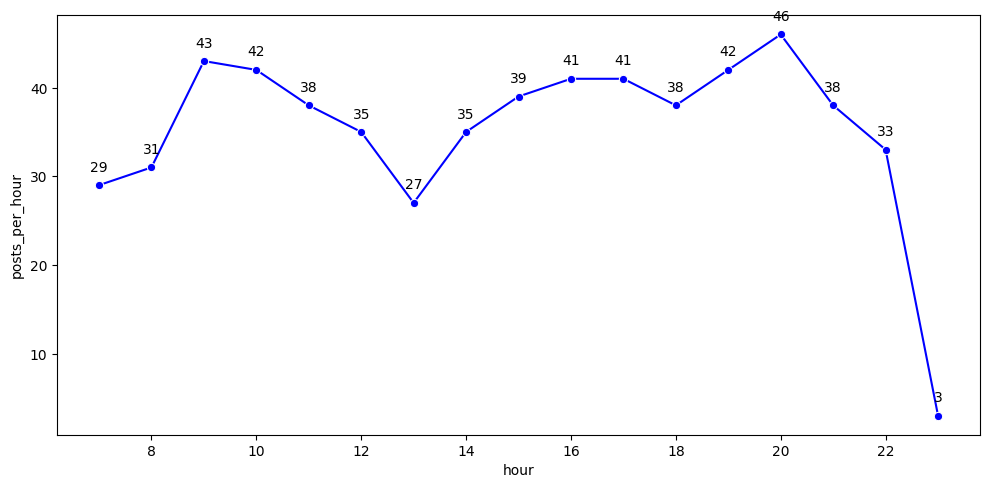

In [254]:
clean_df['hour'] = clean_df['time'].dt.hour
post_per_hour = clean_df.groupby('hour')['hour'].count().reset_index(name='posts_per_hour')

# Create a line plot with markers and display values
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='posts_per_hour', data=post_per_hour, marker='o', color='blue')

# Add text annotations for each point
for i, txt in enumerate(post_per_hour['posts_per_hour']):
    plt.annotate(txt, (post_per_hour['hour'][i], post_per_hour['posts_per_hour'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# Show the plot
plt.tight_layout()
plt.show()

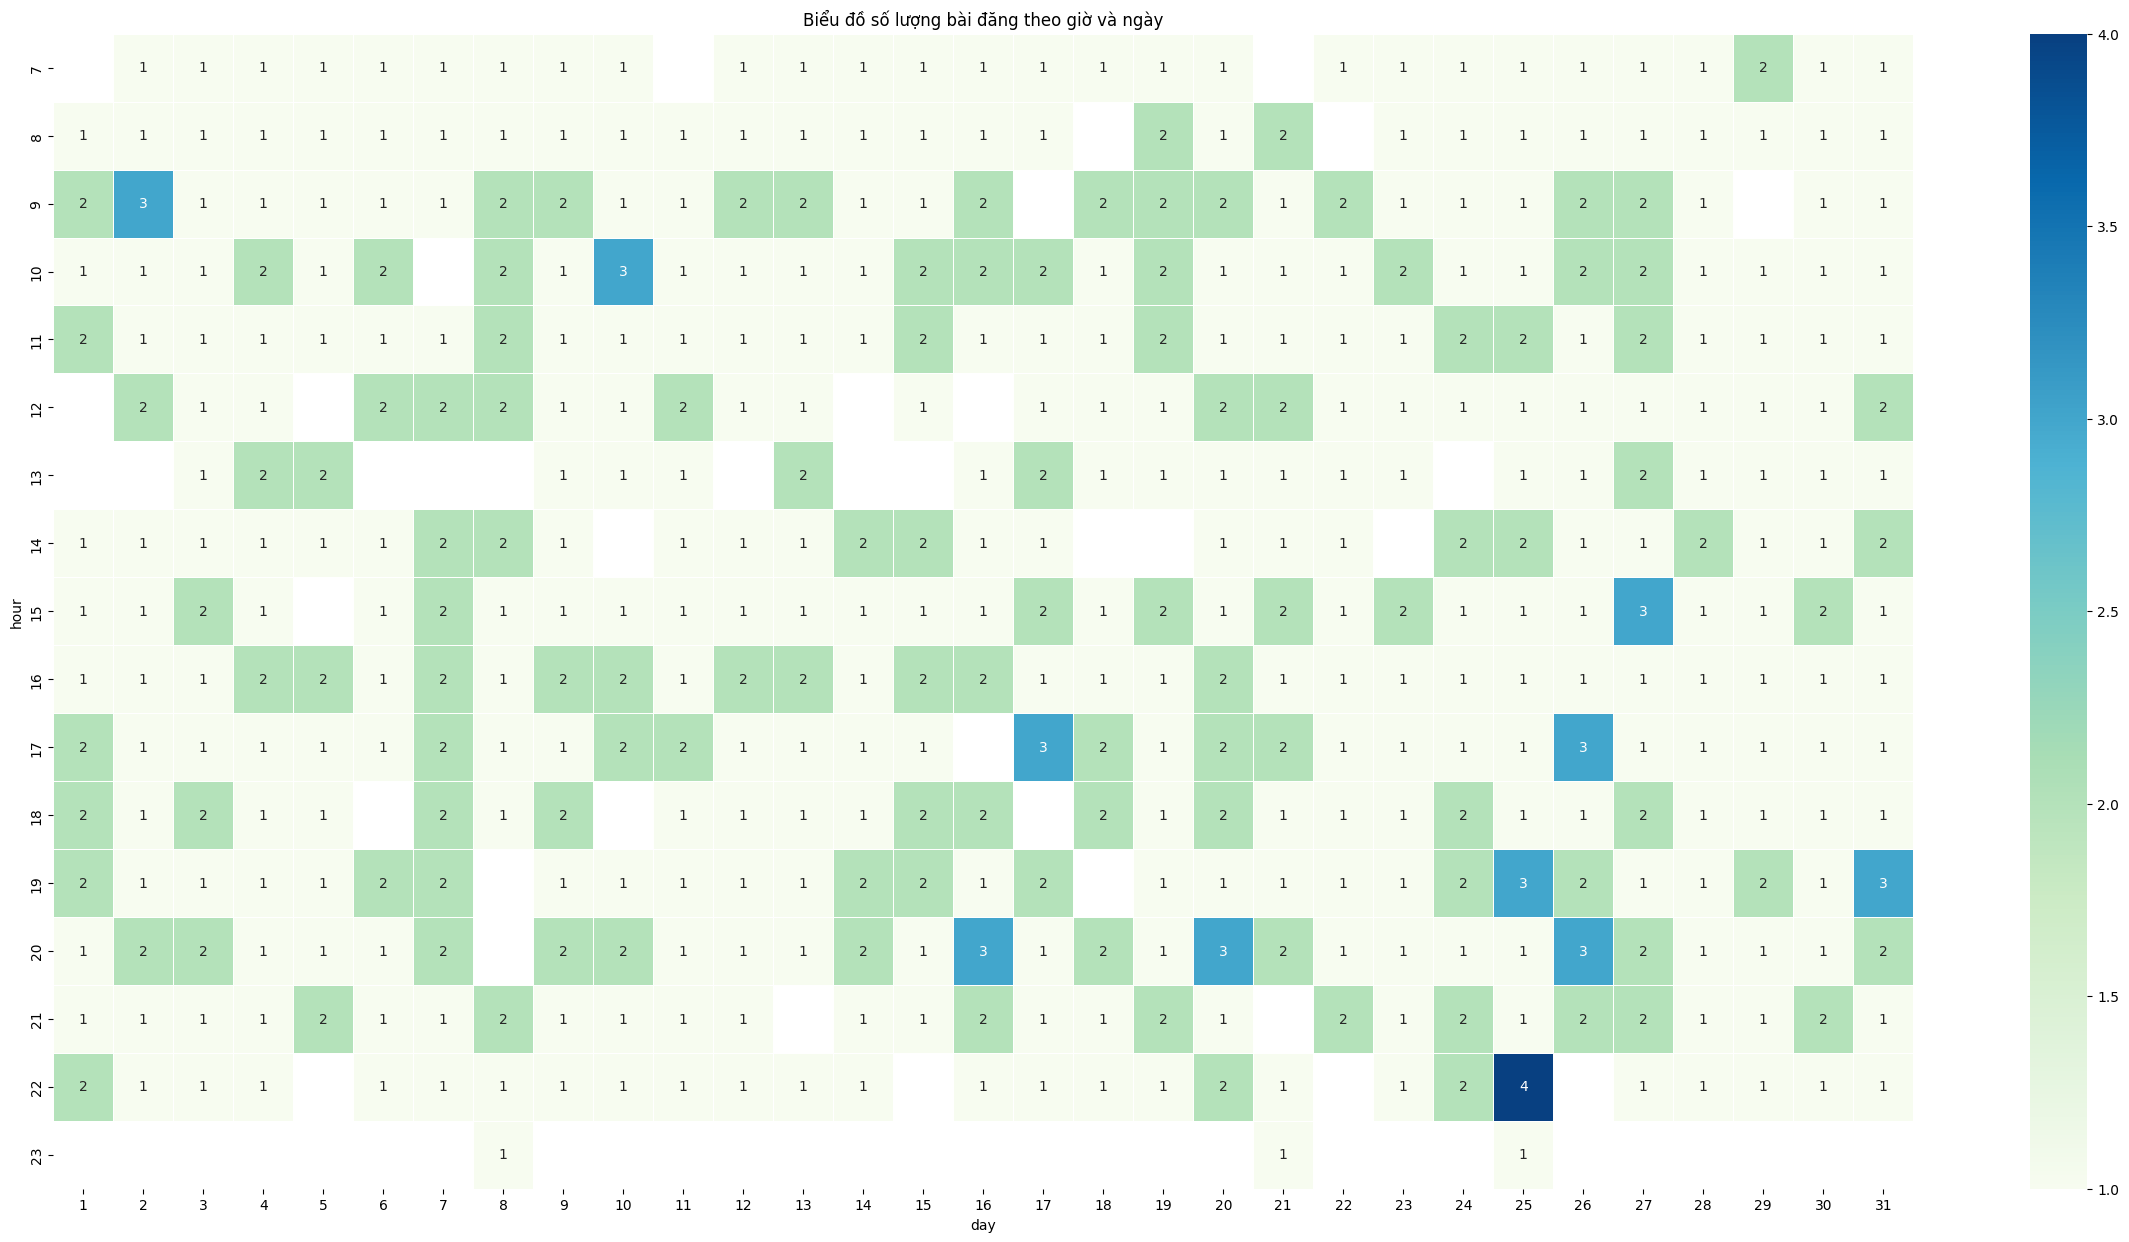

In [255]:
df = clean_df[['day', 'hour']].groupby('day').value_counts()
df = pd.DataFrame(df)
dfsort = df.sort_values(['day', 'hour'])
heatmap_data = dfsort.pivot_table(index='hour', columns='day', values='count', aggfunc='sum')

# Tạo biểu đồ heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(heatmap_data, annot=True, cmap="GnBu", fmt='g', linewidths=.5)

plt.title('Biểu đồ số lượng bài đăng theo giờ và ngày')
plt.show()

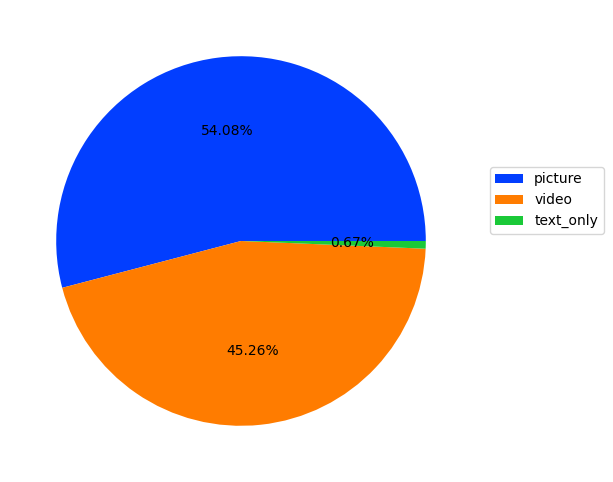

In [256]:
post_per_media = clean_df.groupby('media')['media'].count().reset_index(name='posts_per_media')
plt.figure(figsize=(15, 6))

palette_color = sns.color_palette('bright')
labels = ['picture', 'video', 'text_only']

# Plotting data on the chart
plt.pie(post_per_media['posts_per_media'], colors=palette_color, autopct='%.2f%%')

# Adding a legend
plt.legend(labels, loc='lower right', bbox_to_anchor=(1.3, 0.5))

# Displaying the chart
plt.show()

## Reactions analysis

[]

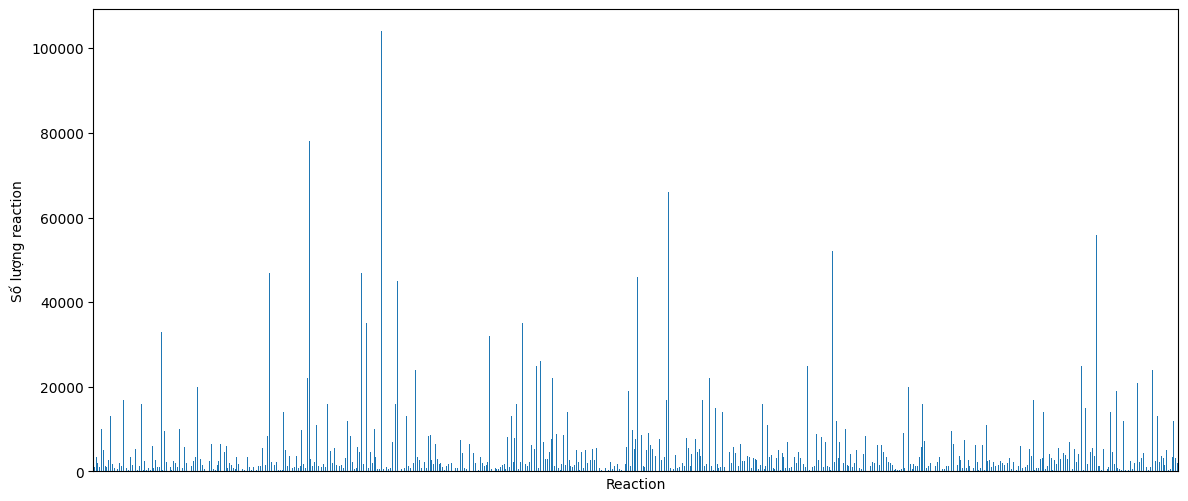

In [330]:
ax = clean_df['reaction'].plot(kind='bar', figsize=(14, 6))
ax.set_ylabel('Số lượng reaction')
ax.set_xlabel('Reaction')
ax.set_xticks([])

In [321]:
sort_reaction = clean_df.sort_values('reaction')
sort_reaction.head(1)

id                                               text  \
403  653661136969761  Theo thống kê của Globocan năm 2020, K tiêu hó...   

                   time  comments  shares  reaction  media  day  hour  
403 2023-10-31 13:00:45         0       2        91      1   31    13

2898252


(-20000.0, 110000.0)

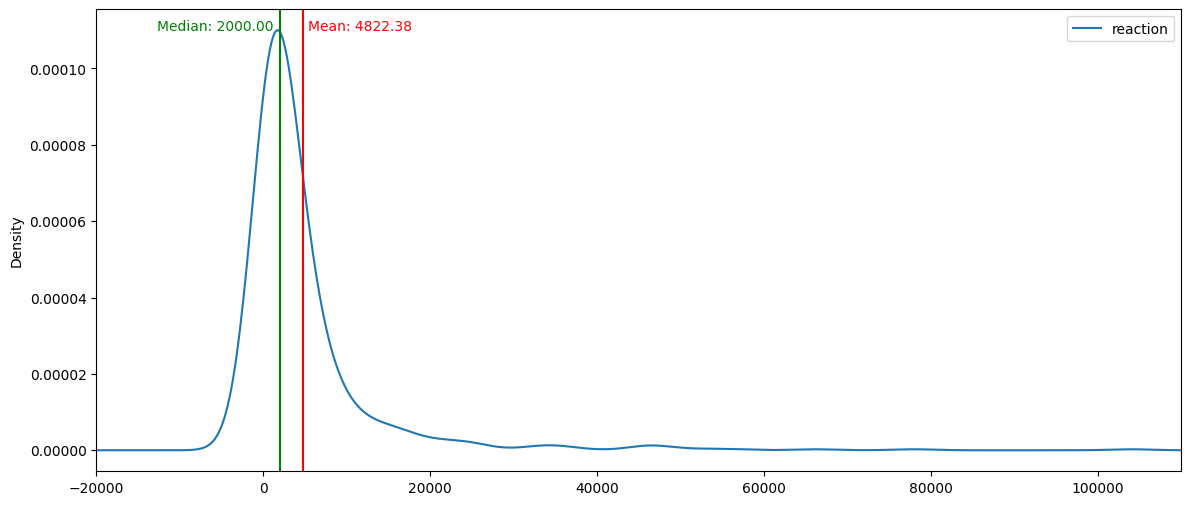

In [337]:
total_reaction = clean_df['reaction'].sum()
print(total_reaction)
ax = clean_df['reaction'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(clean_df['reaction'].mean(), color='red')
ax.axvline(clean_df['reaction'].median(), color='green')

mean_label = f'Mean: {clean_df["reaction"].mean():.2f}'
median_label = f'Median: {clean_df["reaction"].median():.2f}'

ax.annotate(mean_label, 
             xy=(clean_df['reaction'].mean(), 0), 
             xytext=(clean_df['reaction'].mean() + 500, 0.00011),
             fontsize=10, color='red', ha='left')

ax.annotate(median_label, 
             xy=(clean_df['reaction'].median(), 0), 
             xytext=(clean_df['reaction'].median() - 800, 0.00011),
             fontsize=10, color='green', ha='right')

# Thêm chú thích
plt.legend()
ax.set_xlim(-20000,110000)

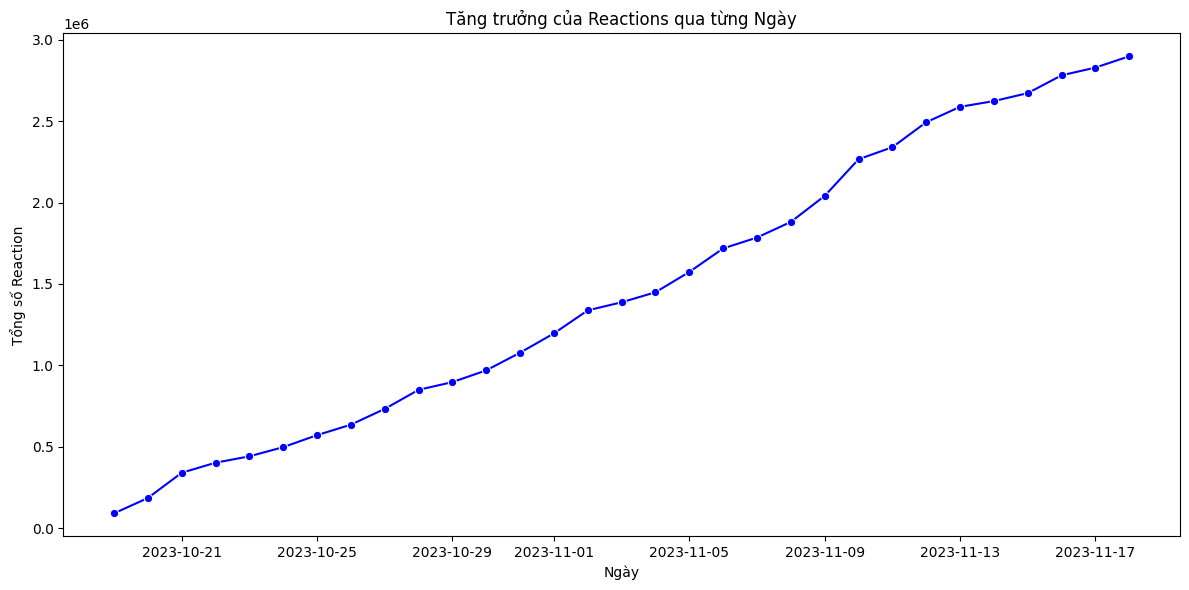

In [329]:
# Group by day and calculate the cumulative sum of reactions for each day
reaction_per_day = clean_df.groupby(clean_df['time'].dt.date)['reaction'].sum().reset_index()
reaction_per_day['cumulative_reaction'] = reaction_per_day['reaction'].cumsum()

# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='cumulative_reaction', data=reaction_per_day, marker='o', color='blue')

# Adding labels and title
plt.xlabel('Ngày')
plt.ylabel('Tổng số Reaction')
plt.title('Tăng trưởng của Reactions qua từng Ngày')

# Display the plot
plt.tight_layout()
plt.show()

[]

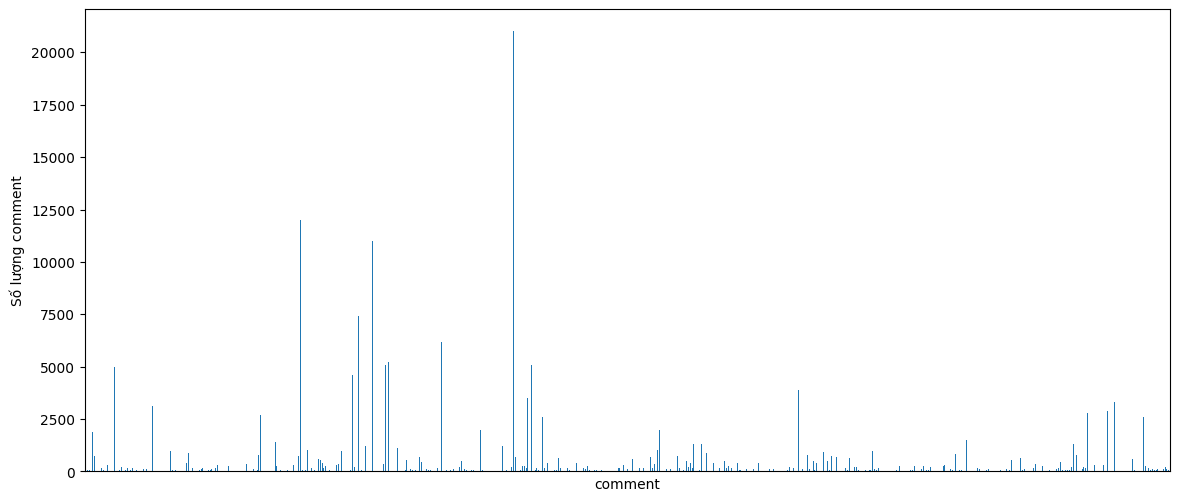

In [332]:
ax = clean_df['comments'].plot(kind='bar', figsize=(14, 6))
ax.set_ylabel('Số lượng comment')
ax.set_xlabel('comment')
ax.set_xticks([])

In [333]:
sort_comment = clean_df.sort_values('comments')
sort_comment.head(1)

id                                               text  \
378  654232560245952  Hà Nội có những con phố không chỉ để đi qua mà...   

                   time  comments  shares  reaction  media  day  hour  
378 2023-11-01 18:00:21         0       7       218      2    1    18

In [334]:
sort_comment = clean_df.sort_values('comments', ascending=False)
sort_comment.head(1)

id                                               text  \
290  656752916660583  "Từ năm 2021 đến 9/2023, các công ty bảo hiểm ...   

                   time  comments  shares  reaction  media  day  hour  
290 2023-11-06 12:30:21     21000    4500     35000      2    6    12

204136


(-5000.0, 25000.0)

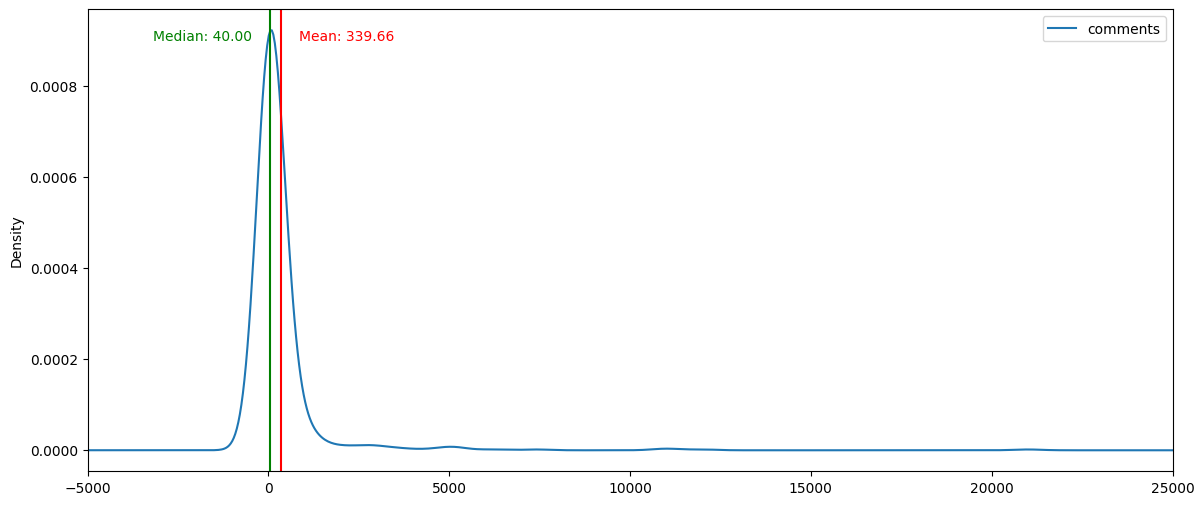

In [338]:
total_comments = clean_df['comments'].sum()
print(total_comments)
ax = clean_df['comments'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(clean_df['comments'].mean(), color='red')
ax.axvline(clean_df['comments'].median(), color='green')

mean_label = f'Mean: {clean_df["comments"].mean():.2f}'
median_label = f'Median: {clean_df["comments"].median():.2f}'

ax.annotate(mean_label, 
             xy=(clean_df['comments'].mean(), 0), 
             xytext=(clean_df['comments'].mean() + 500, 0.0009),
             fontsize=10, color='red', ha='left')

ax.annotate(median_label, 
             xy=(clean_df['comments'].median(), 0), 
             xytext=(clean_df['comments'].median() - 500, 0.0009),
             fontsize=10, color='green', ha='right')

# Thêm chú thích
plt.legend()
ax.set_xlim(-5000,25000)

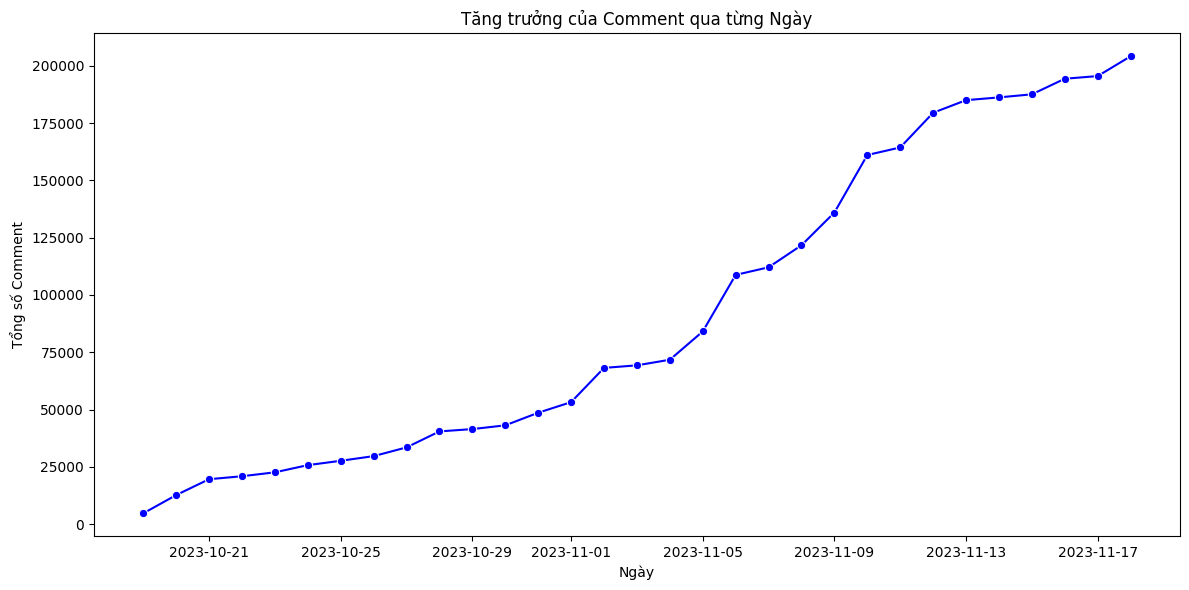

In [339]:
# Group by day and calculate the cumulative sum of reactions for each day
comment_per_day = clean_df.groupby(clean_df['time'].dt.date)['comments'].sum().reset_index()
comment_per_day['cumulative_reaction'] = comment_per_day['comments'].cumsum()

# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='cumulative_reaction', data=comment_per_day, marker='o', color='blue')

# Adding labels and title
plt.xlabel('Ngày')
plt.ylabel('Tổng số Comment')
plt.title('Tăng trưởng của Comment qua từng Ngày')

# Display the plot
plt.tight_layout()
plt.show()

[]

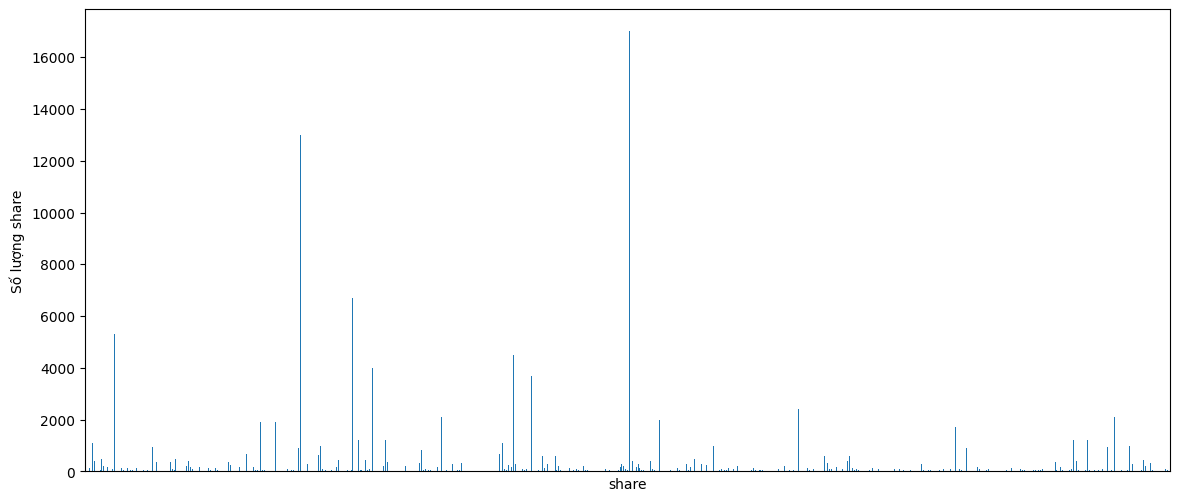

In [341]:
ax = clean_df['shares'].plot(kind='bar', figsize=(14, 6))
ax.set_ylabel('Số lượng share')
ax.set_xlabel('share')
ax.set_xticks([])

In [342]:
sort_share = clean_df.sort_values('shares')
sort_share.head(1)

id                                               text  \
625  647539344248607  📈Việt Nam ghi nhận khoảng 5 triệu người mắc su...   

                   time  comments  shares  reaction  media  day  hour  
625 2023-10-20 12:30:05         0       0       116      1   20    12

In [343]:
sort_share = clean_df.sort_values('shares', ascending = False)
sort_share.head(1)

id                                               text  \
354  654916293510912  Buộc phải tháo khớp các chi hoại tử sau khi ăn...   

                   time  comments  shares  reaction  media  day  hour  
354 2023-11-02 20:41:42     11000   17000     46000      2    2    20

126164


(-3000.0, 20000.0)

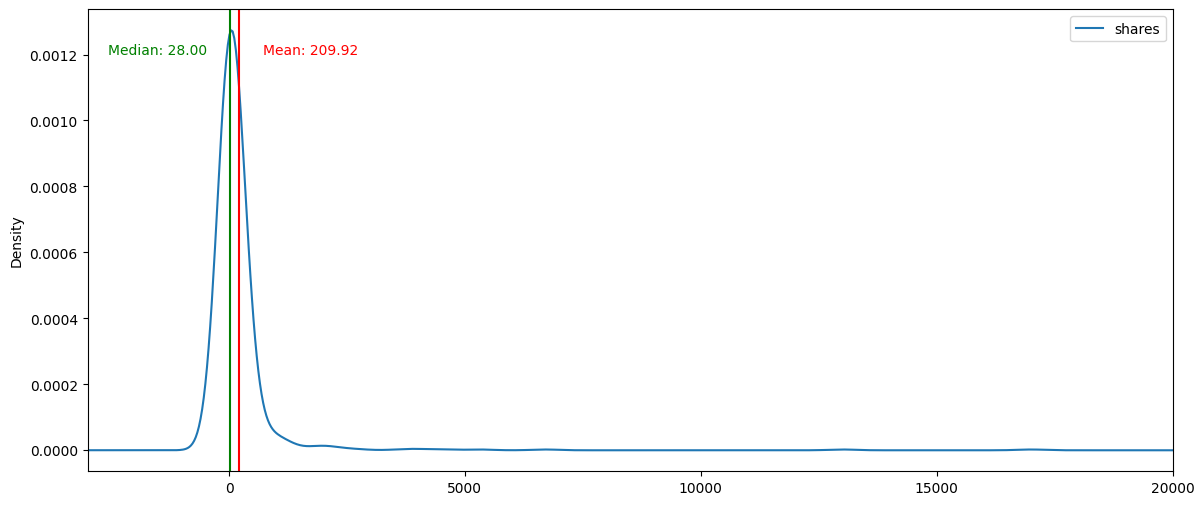

In [344]:
total_shares = clean_df['shares'].sum()
print(total_shares)
ax = clean_df['shares'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(clean_df['shares'].mean(), color='red')
ax.axvline(clean_df['shares'].median(), color='green')

mean_label = f'Mean: {clean_df["shares"].mean():.2f}'
median_label = f'Median: {clean_df["shares"].median():.2f}'

ax.annotate(mean_label, 
             xy=(clean_df['shares'].mean(), 0), 
             xytext=(clean_df['shares'].mean() + 500, 0.0012),
             fontsize=10, color='red', ha='left')

ax.annotate(median_label, 
             xy=(clean_df['shares'].median(), 0), 
             xytext=(clean_df['shares'].median() - 500, 0.0012),
             fontsize=10, color='green', ha='right')

# Thêm chú thích
plt.legend()
ax.set_xlim(-3000,20000)

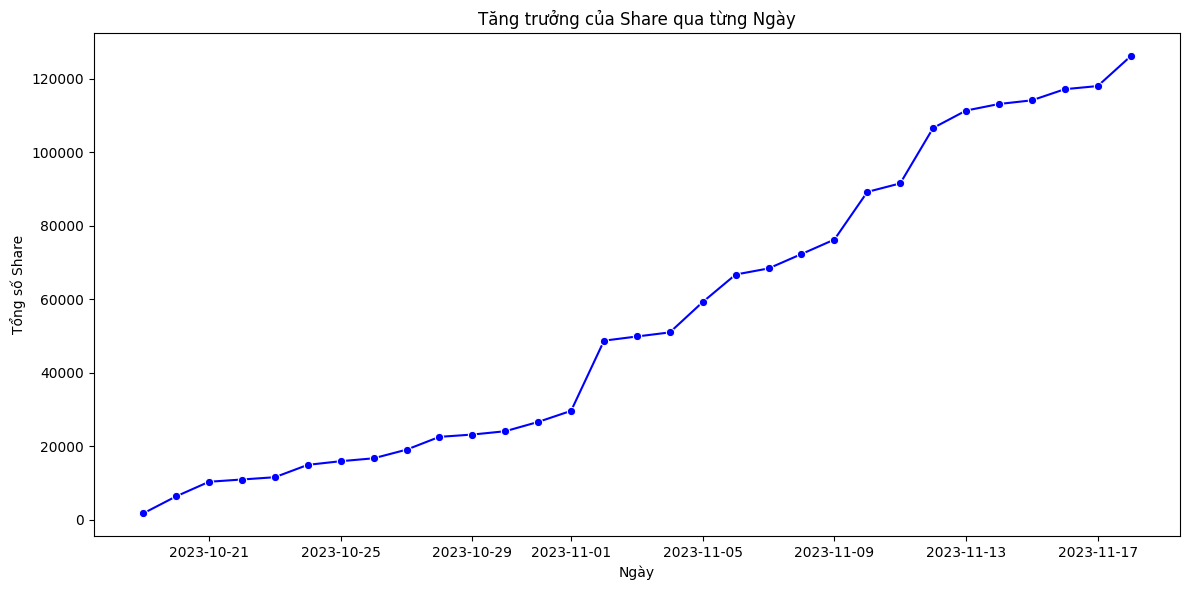

In [345]:
# Group by day and calculate the cumulative sum of reactions for each day
share_per_day = clean_df.groupby(clean_df['time'].dt.date)['shares'].sum().reset_index()
share_per_day['cumulative_reaction'] = share_per_day['shares'].cumsum()

# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='cumulative_reaction', data=share_per_day, marker='o', color='blue')

# Adding labels and title
plt.xlabel('Ngày')
plt.ylabel('Tổng số Share')
plt.title('Tăng trưởng của Share qua từng Ngày')

# Display the plot
plt.tight_layout()
plt.show()

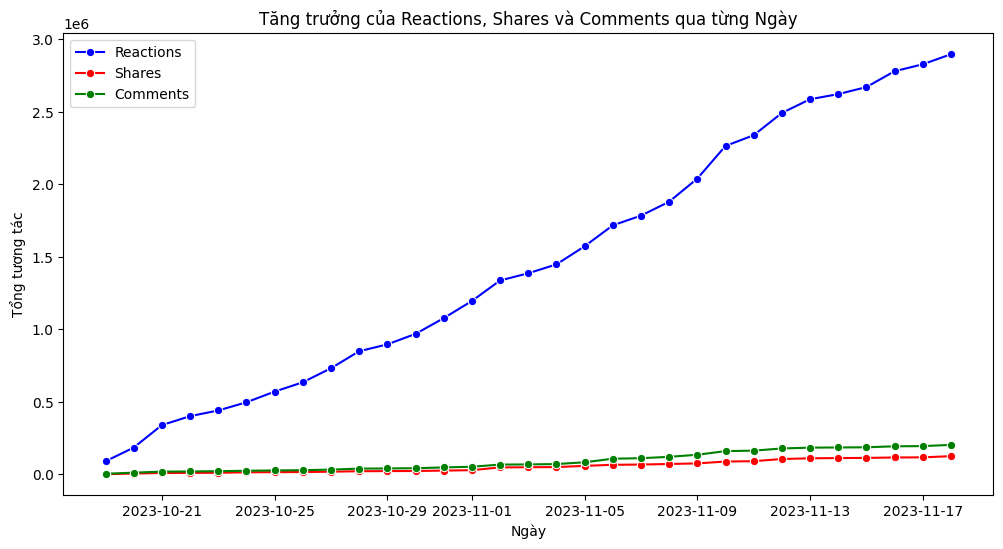

In [349]:
# Group by day and calculate the cumulative sum of reactions, shares, comments for each day
cumulative_data = clean_df.groupby(clean_df['time'].dt.date)[['reaction', 'shares', 'comments']].sum().reset_index()
cumulative_data['cumulative_reaction'] = cumulative_data['reaction'].cumsum()
cumulative_data['cumulative_shares'] = cumulative_data['shares'].cumsum()
cumulative_data['cumulative_comments'] = cumulative_data['comments'].cumsum()

# Plotting the line chart
plt.figure(figsize=(12, 6))

# Plotting cumulative reactions
sns.lineplot(x='time', y='cumulative_reaction', data=cumulative_data, marker='o', label='Reactions', color='blue')

# Plotting cumulative shares
sns.lineplot(x='time', y='cumulative_shares', data=cumulative_data, marker='o', label='Shares', color='red')

# Plotting cumulative comments
sns.lineplot(x='time', y='cumulative_comments', data=cumulative_data, marker='o', label='Comments', color='green')

# Adding labels and title
plt.xlabel('Ngày')
plt.ylabel('Tổng tương tác')
plt.title('Tăng trưởng của Reactions, Shares và Comments qua từng Ngày')

# Display the legend
plt.legend()

# Display the plot
plt.show()


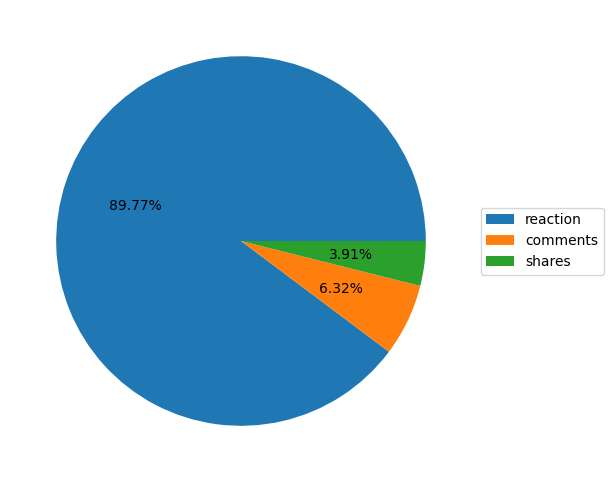

In [263]:
data = [total_reaction, total_comments, total_shares]
labels = ['reaction', 'comments', 'shares']
plt.figure(figsize=(15, 6))
# Plotting data on the chart
plt.pie(data, autopct='%.2f%%')
# Adding a legend
plt.legend(labels, loc='center right', bbox_to_anchor=(1.3, 0.5))

# Displaying the chart
plt.show()

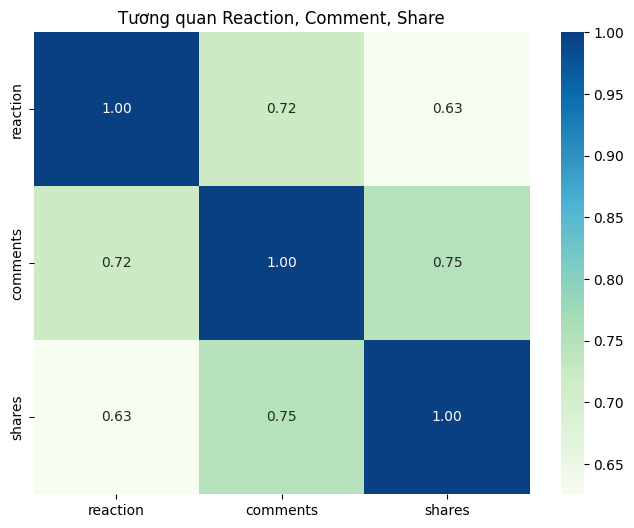

In [359]:
# Tạo biểu đồ heatmap
plt.figure(figsize=(8, 6))
heatmap_data = clean_df[['reaction','comments', 'shares']].corr()
sns.heatmap(heatmap_data, annot=True, cmap='GnBu', fmt=".2f")

# Đặt tên cho biểu đồ
plt.title('Tương quan Reaction, Comment, Share')

# Hiển thị biểu đồ
plt.show()

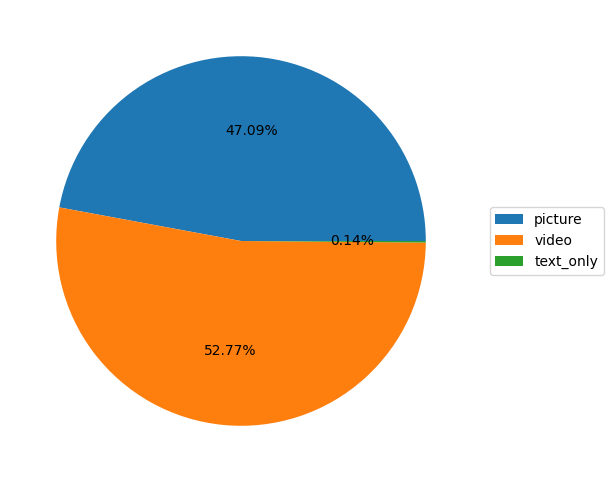

In [264]:
reaction_per_media = clean_df[['media', 'comments', 'shares', 'reaction']].groupby('media').agg({
    'comments': 'sum',
    'shares': 'sum',
    'reaction': 'sum'
}).reset_index()
reaction_per_media['total'] = reaction_per_media['comments']+reaction_per_media['reaction']+reaction_per_media['shares']
labels = ['picture', 'video', 'text_only']
data = reaction_per_media['total']
plt.figure(figsize=(15, 6))
# Plotting data on the chart
plt.pie(data, autopct='%.2f%%')
# Adding a legend
plt.legend(labels, loc='center right', bbox_to_anchor=(1.3, 0.5))

# Displaying the chart
plt.show()

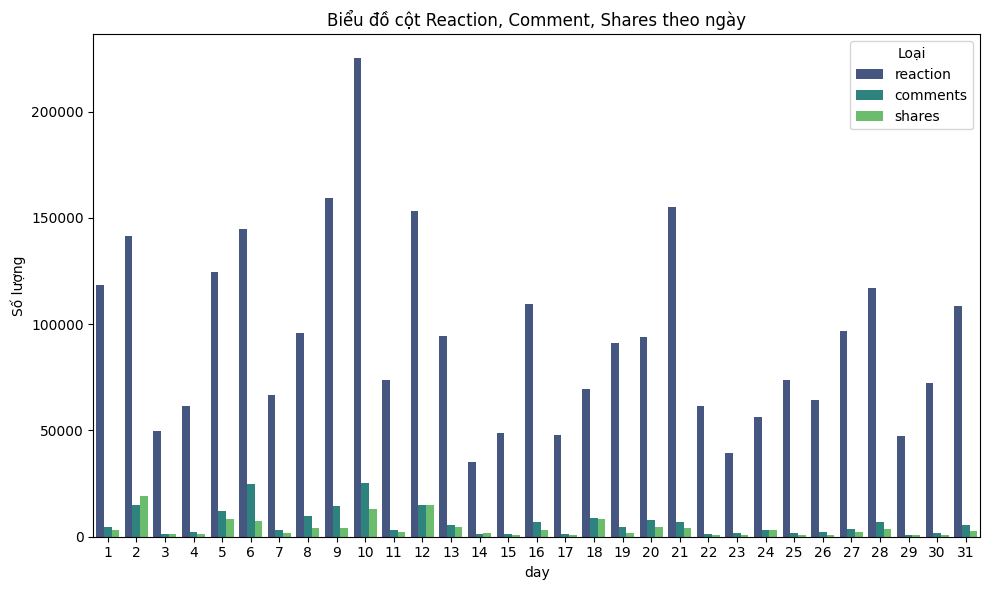

In [265]:
reaction_per_day = clean_df[['day', 'reaction', 'comments', 'shares']].groupby('day').agg({
    'reaction': 'sum',
    'comments': 'sum',
    'shares': 'sum'
}).reset_index()

# Chuyển định dạng dữ liệu để phù hợp với biểu đồ cột chồng
reaction_per_day.set_index('day', inplace=True)
df_stacked = reaction_per_day.stack().reset_index().rename(columns={'level_1': 'Loại', 0: 'Số lượng'})

# Vẽ biểu đồ cột chồng
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='Số lượng', hue='Loại', data=df_stacked, palette='viridis')

# Thêm tiêu đề và chú thích
plt.title('Biểu đồ cột Reaction, Comment, Shares theo ngày')
plt.xlabel('day')
plt.ylabel('Số lượng')
plt.legend(title='Loại')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

## Phân tích nội dung bài viếtviết

In [396]:
df_text = clean_df[['id','text']]
text = (df_text['text']).tolist()

/tmp/ipykernel_201/615776195.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  STOPWORDS = pd.read_table('Data/stopword.txt', delimiter=', ')


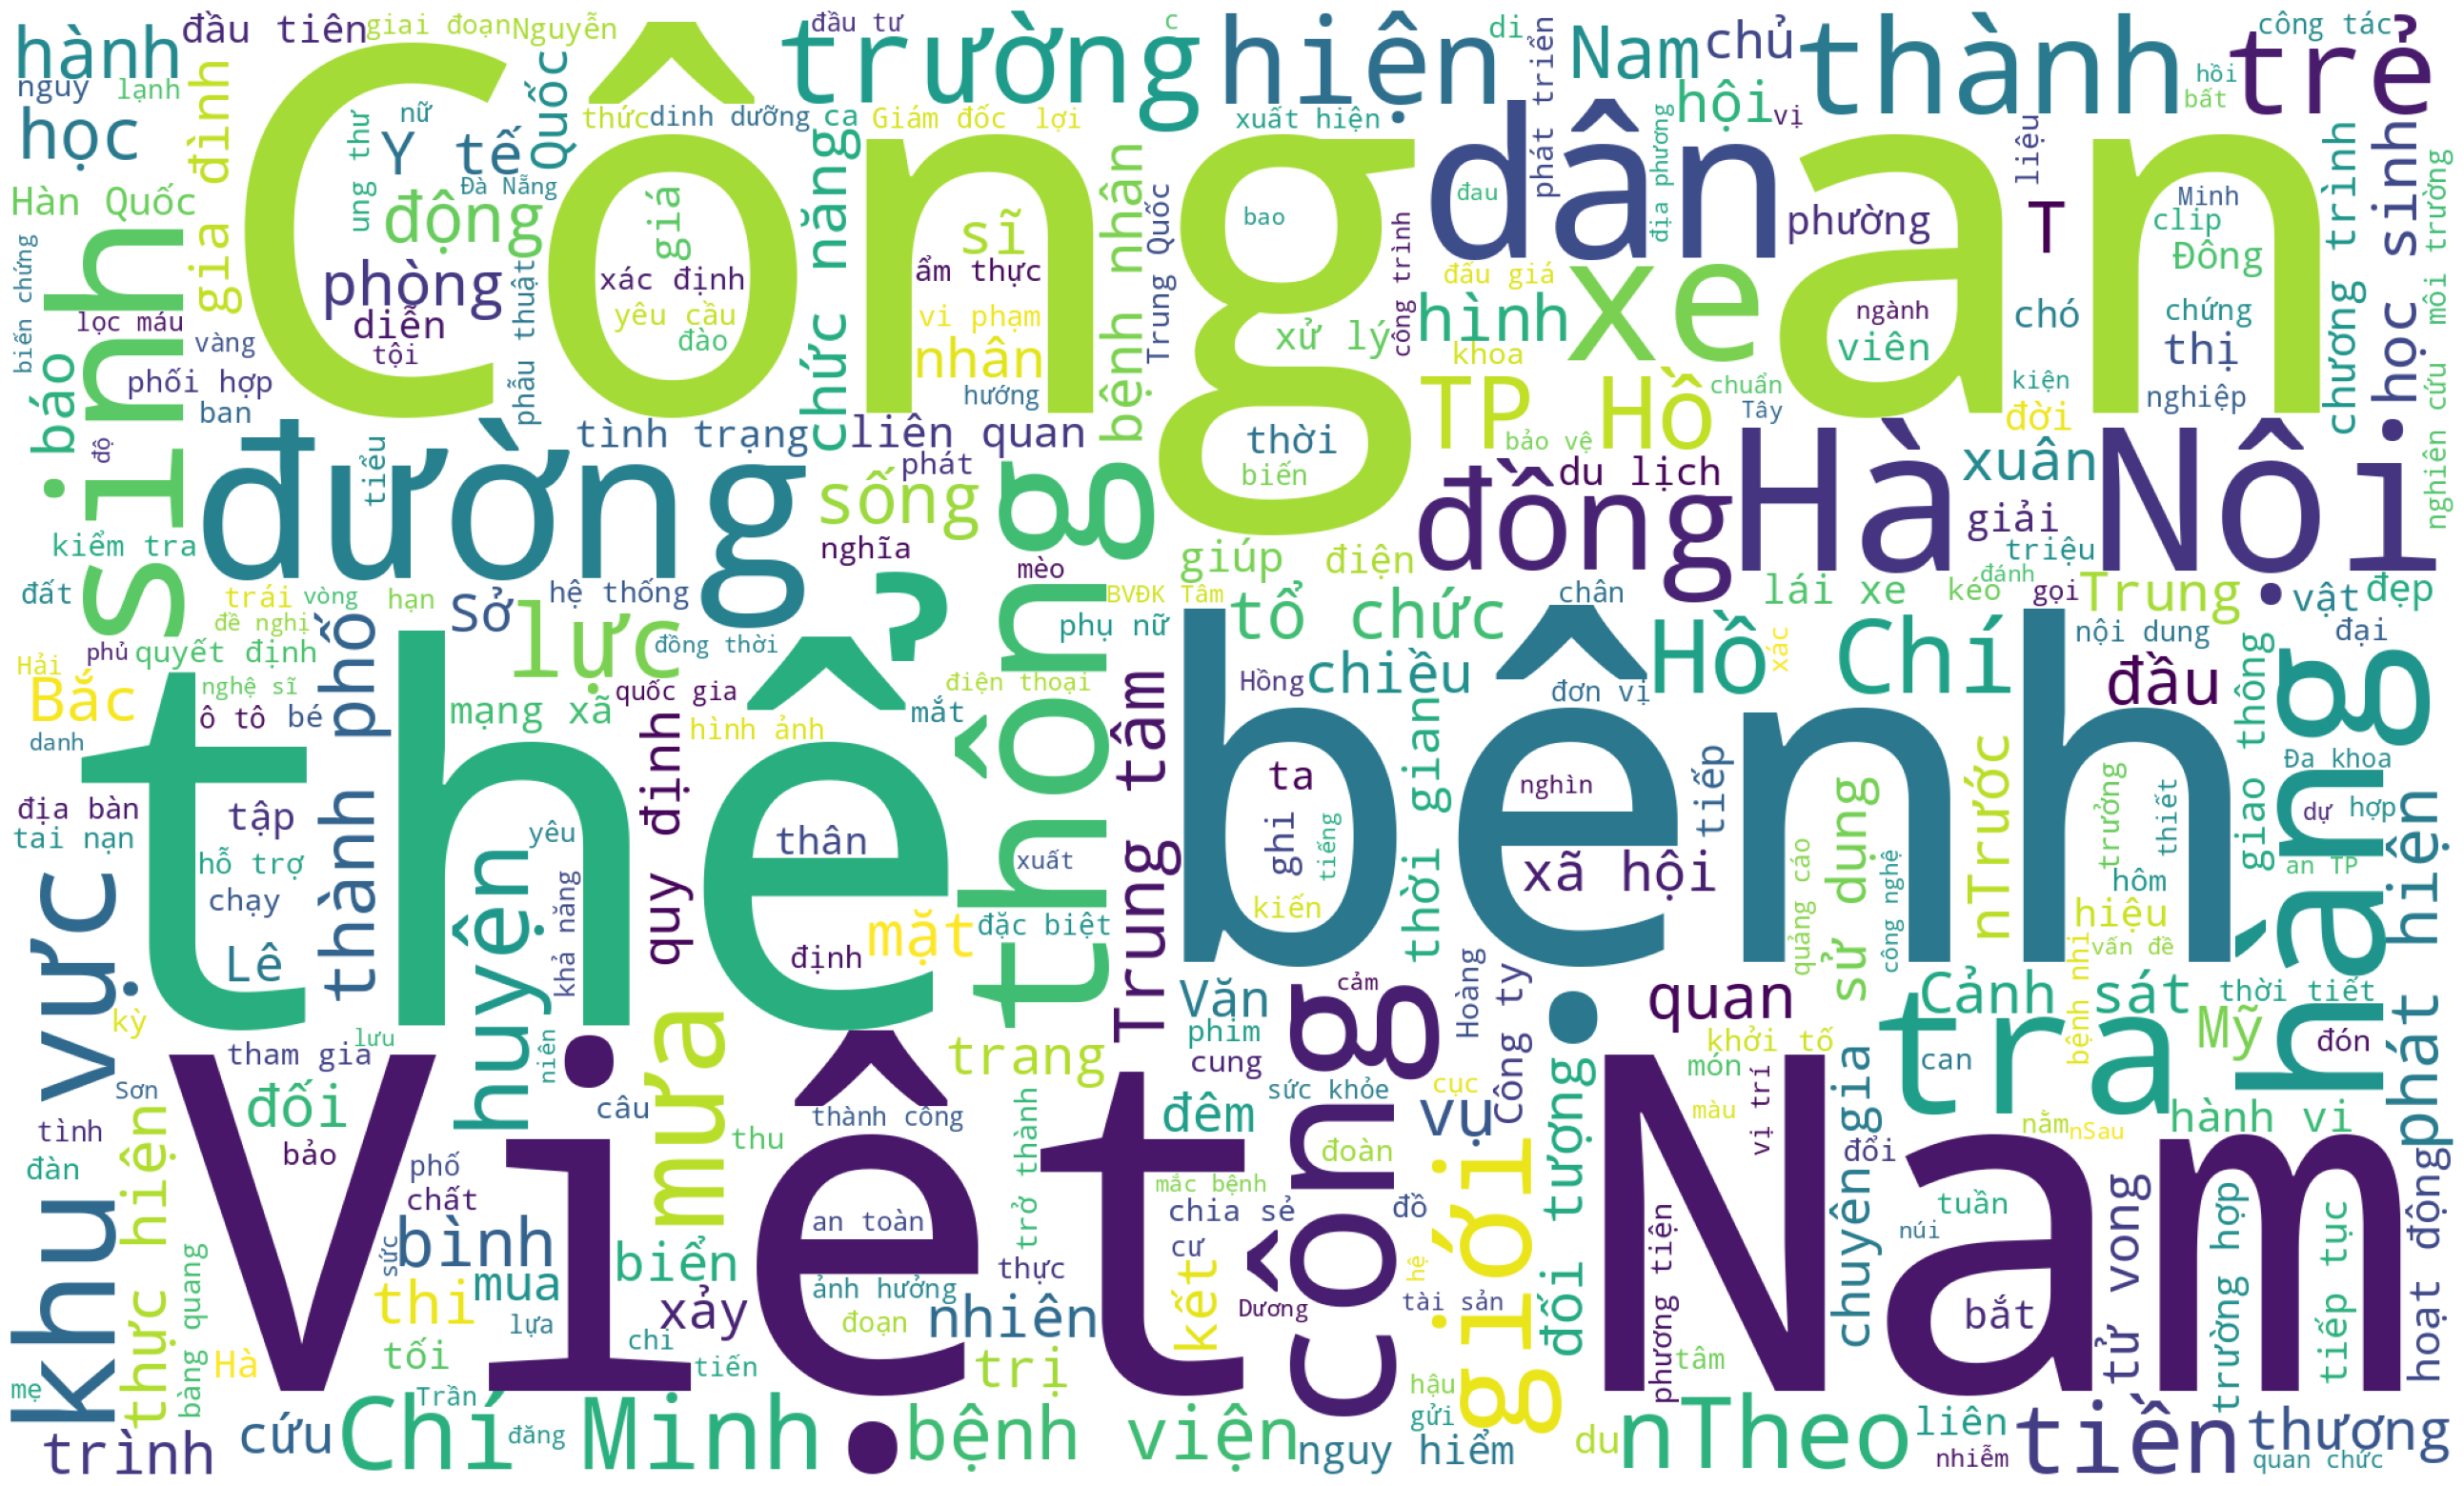

In [397]:
from wordcloud import WordCloud, STOPWORDS

STOPWORDS = pd.read_table('Data/stopword.txt', delimiter=', ')
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(str(text))
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [398]:
# Lấy thông tin về từ và tần suất xuất hiện
word_freq = wordcloud.words_

# Sắp xếp theo tần suất giảm dần
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# In ra top 10 từ khóa
for word, freq in sorted_word_freq[:20]:
    print(f"{word}: {freq}")

thể: 1.0
Công an: 0.9672131147540983
Việt Nam: 0.8688524590163934
bệnh: 0.8524590163934426
đường: 0.8032786885245902
dân: 0.7950819672131147
Hà Nội: 0.7950819672131147
thông: 0.7704918032786885
hàng: 0.7540983606557377
công: 0.7295081967213115
sinh: 0.6721311475409836
tra: 0.6311475409836066
xe: 0.6229508196721312
đồng: 0.6229508196721312
khu vực: 0.6229508196721312
thành: 0.5819672131147541
giới: 0.5655737704918032
mưa: 0.5573770491803278
trường: 0.5491803278688525
hiện: 0.5491803278688525


In [357]:
clean_df['len'] = clean_df['text'].apply(len)
clean_df

id                                               text  \
53   663091229360085  Trên lộ trình, du khách có thể tùy thích dừng ...   
54   663091052693436  Dẫu biết thời gian sẽ làm cho những tác phẩm n...   
55   663091072693434  Một hành động ý nghĩa mang lại niềm vui cho cả...   
56   663005179368690  Video này có thể sẽ làm bạn thấy thèm ăn lê !!...   
57   663062376029637  Tà Xùa đang vào mua săn mây. Vậy thời tiết thế...   
..               ...                                                ...   
649  646908824311659                     Bão số 5 có khả năng mạnh thêm   
650  646884690980739  Tổ chức Kỷ lục Thế giới Guinness công nhận Pep...   
651  646875950981613  Ngày 18/10, Lực lượng Không quân Hàn Quốc (ROK...   
652  646872747648600  Miền Bắc đón không khí lạnh kết hợp cùng mưa d...   
653  646871397648735  Bão số 5 hiện đang mạnh cấp 8, giật cấp 10\n\n...   

                   time  comments  shares  reaction  media  day  hour  len  
53  2023-11-18 22:00:59        53      48      1100      2   18    22  195  
54  2023-11-18 21:00:56        51      33      3500      2   18    21  153  
55  2023-11-18 20:30:53        69     125      2000      2   18    20  127  
56  2023-11-18 20:00:49        19      30      1100      2   18    20  391  
57  2023-11-18 18:49:22      1900    1100     10000      2   18    18  202  
..                  ...       ...     ...       ...    ...  ...   ...  ...  
649 2023-10-19 09:40:03         4       5       569      1   19     9   30  
650 2023-10-19 09:10:01       123      24      3500      1   19     9  734  
651 2023-10-19 08:40:00       191      82     12000      1   19     8  908  
652 2023-10-19 08:00:07       128      66      3200      1   19     8   97  
653 2023-10-19 07:31:42        53      32      2100      1   19     7  944  

[601 rows x 10 columns]

[]

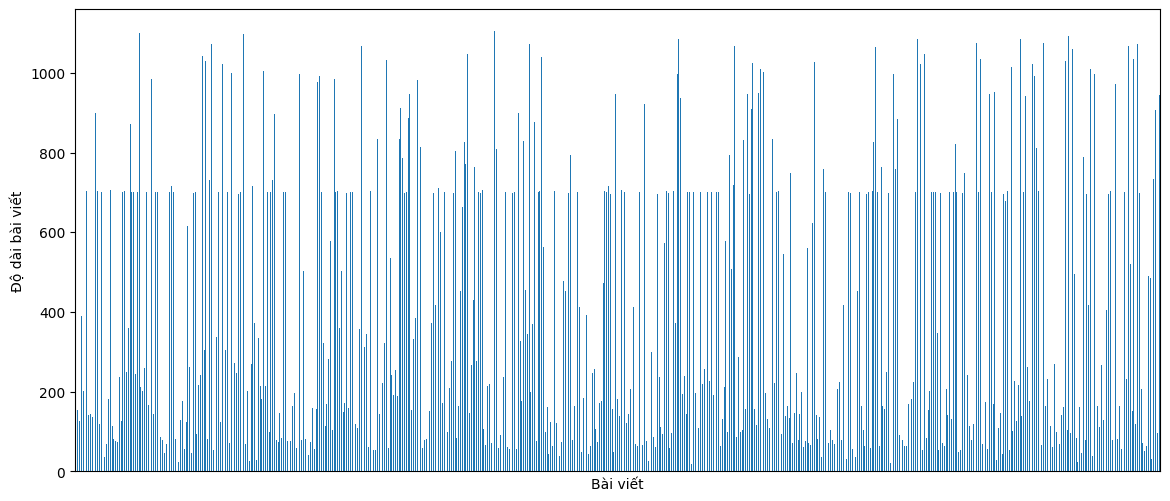

In [360]:
ax = clean_df['len'].plot(kind='bar', figsize=(14, 6))
ax.set_ylabel('Độ dài bài viết')
ax.set_xlabel('Bài viết')
ax.set_xticks([])

(-500.0, 1500.0)

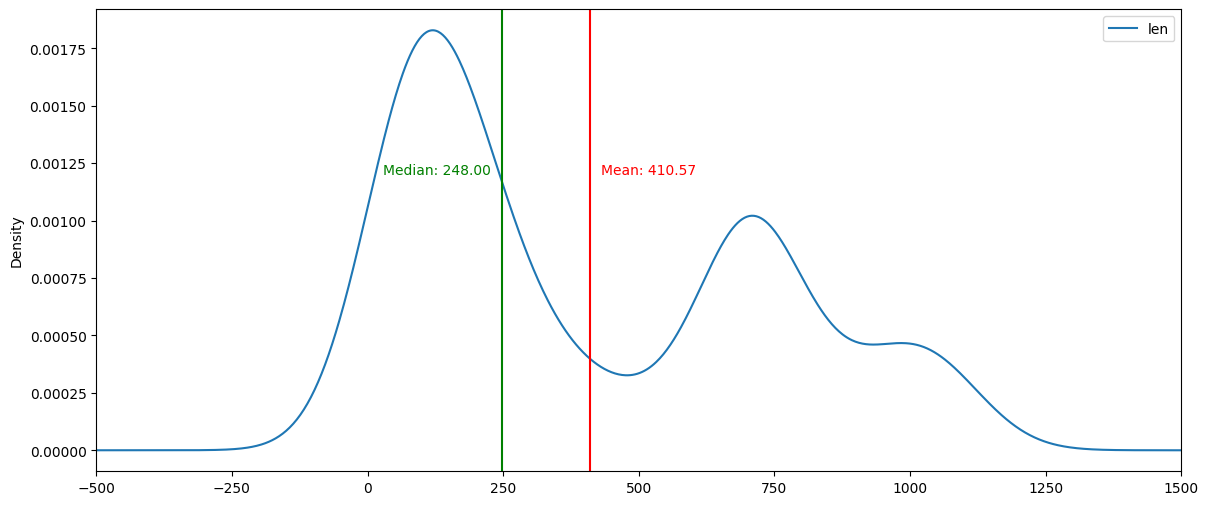

In [367]:
ax = clean_df['len'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(clean_df['len'].mean(), color='red')
ax.axvline(clean_df['len'].median(), color='green')

mean_label = f'Mean: {clean_df["len"].mean():.2f}'
median_label = f'Median: {clean_df["len"].median():.2f}'

ax.annotate(mean_label, 
             xy=(clean_df['len'].mean(), 0), 
             xytext=(clean_df['len'].mean() + 20, 0.0012),
             fontsize=10, color='red', ha='left')

ax.annotate(median_label, 
             xy=(clean_df['len'].median(), 0), 
             xytext=(clean_df['len'].median() - 20, 0.0012),
             fontsize=10, color='green', ha='right')

# Thêm chú thích
plt.legend()
ax.set_xlim(-500,1500)

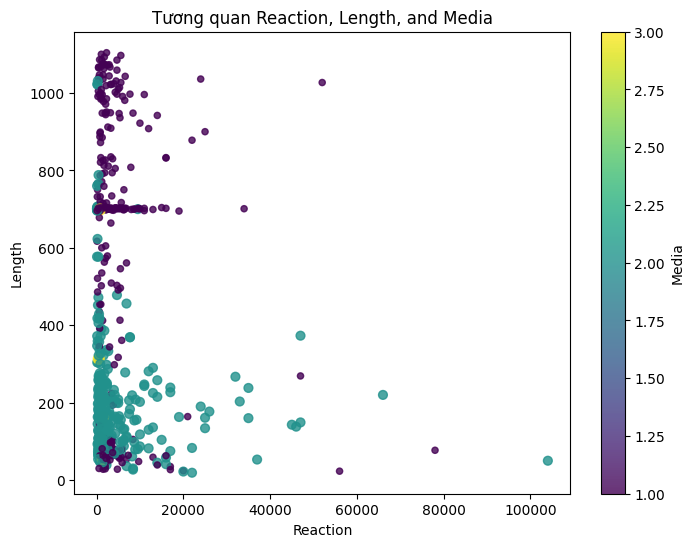

In [368]:
# Tạo biểu đồ sự tương quan
plt.figure(figsize=(8, 6))

# Biểu đồ scatter plot
plt.scatter(clean_df['reaction'], clean_df['len'], c=clean_df['media'], cmap='viridis', s=clean_df['media']*20, alpha=0.8)

# Đặt tên cho trục x và y
plt.xlabel('Reaction')
plt.ylabel('Length')
plt.title('Tương quan Reaction, Length, and Media')

# Hiển thị colorbar để thể hiện giá trị của cột 'media'
cbar = plt.colorbar()
cbar.set_label('Media')

# Hiển thị biểu đồ
plt.show()

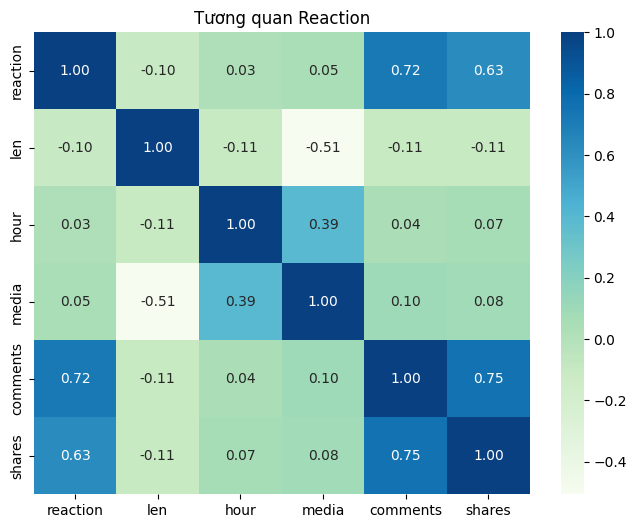

In [370]:
# Tạo biểu đồ heatmap
plt.figure(figsize=(8, 6))
heatmap_data = clean_df[['reaction', 'len', 'hour', 'media', 'comments', 'shares']].corr()
sns.heatmap(heatmap_data, annot=True, cmap='GnBu', fmt=".2f")

# Đặt tên cho biểu đồ
plt.title('Tương quan Reaction')

# Hiển thị biểu đồ
plt.show()

## Phụ nữ Việt Nam 20/10

In [399]:
women_day = pd.to_datetime('20-10-2023')
women_df = clean_df[clean_df['time'].dt.date == women_day.date()]
women_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 609 to 632
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        24 non-null     int64         
 1   text      24 non-null     object        
 2   time      24 non-null     datetime64[ns]
 3   comments  24 non-null     int64         
 4   shares    24 non-null     int64         
 5   reaction  24 non-null     int64         
 6   media     24 non-null     int64         
 7   day       24 non-null     int32         
 8   hour      24 non-null     int32         
 9   len       24 non-null     int64         
dtypes: datetime64[ns](1), int32(2), int64(6), object(1)
memory usage: 1.9+ KB


/tmp/ipykernel_201/965666762.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  women_day = pd.to_datetime('20-10-2023')


In [400]:
women_df

id                                               text  \
609  647721234230418  Sáng 20/10, chương trình Lễ cưới tập thể năm 2...   
610  647759124226629     Thế giới sẽ ra sao nếu như "một nửa" biến mất?   
611  647728010896407  CÓ MỘT 20/10 NGẬP TRÀN HẠNH PHÚC\nCó nước mắt,...   
612  647721230897085  "Bộ môn mạo hiểm" được thực hiện bằng kinh ngh...   
613  238649112532713  📈Việt Nam ghi nhận khoảng 5 triệu người mắc su...   
614  647675307568344  Người dùng Việt cần trung bình 55,6 ngày làm v...   
615  647621964240345  Chiều ngày 16/10, nhãn hàng sữa đậu nành Fami ...   
616  647645114238030            Bức ảnh phát ra tiếng cười hạnh phúc. 🥹   
617  647618527574022  Làm việc với Công an, Trần Thị Ngọc Trinh (sin...   
618  647615007574374  Lãnh đạo Bộ VH, TT&DL chỉ đạo Cục TDTT tiếp tụ...   
619  647596267576248  Gần về cuối năm, tình trạng buôn lậu pháo hoa ...   
620  647618077574067  Hãy tin tưởng và yêu thương sự lựa chọn của ch...   
621  647588787576996  Phụ nữ là một nửa tuyệt vời nhất của tạo hóa, ...   
622  647578287578046  20/10 năm nay, bên cạnh hoa tươi luôn là lựa c...   
623  647570027578872  Cảnh báo: Xuất hiện nhiều mặt hàng thuốc lá đi...   
624  647530557582819  Theo thống kê của các chuyên gia về sức khoẻ t...   
625  647539344248607  📈Việt Nam ghi nhận khoảng 5 triệu người mắc su...   
626  647486554253886  Cục Đăng kiểm Việt Nam vừa đưa ra cảnh báo về ...   
627  647490390920169  Cảm ơn các chị, em rất nhiều vì đã tạo động lự...   
628  647503394252202  Ngày 20/10, thông tin từ Công an thành phố Đà ...   
629  647485147587360  Tại Quyết định số 3896/QĐ-BYT do PGS.TS Nguyễn...   
630  647477667588108  Nhân ngày Phụ nữ Việt Nam 20/10, chúng mình xi...   
631  647446430924565  CHÚC MỪNG NGÀY PHỤ NỮ VIỆT NAM 20/10\n\nChúc c...   
632  647430604259481  Thời tiết ngày 20/10: Bắc Bộ và Bắc Trung Bộ c...   

                   time  comments  shares  reaction  media  day  hour   len  
609 2023-10-20 22:45:39        28      53      1300      2   20    22   161  
610 2023-10-20 22:22:44        29      31      1400      2   20    22    46  
611 2023-10-20 21:40:07        10       9       457      2   20    21   788  
612 2023-10-20 20:58:34       324      67      5300      2   20    20    78  
613 2023-10-20 20:14:09        25      11       139      2   20    20   696  
614 2023-10-20 20:02:20        27      47       667      2   20    20   418  
615 2023-10-20 19:00:05        40       0      1100      1   20    19  1009  
616 2023-10-20 18:30:05       695      77     14000      1   20    18    39  
617 2023-10-20 18:00:03       308      23      4700      1   20    18   997  
618 2023-10-20 17:30:01        35       5      1700      1   20    17  1063  
619 2023-10-20 17:01:04      2900     935     19000      2   20    17   163  
620 2023-10-20 16:30:38        16      32       854      2   20    16   112  
621 2023-10-20 16:00:06        10      72       672      2   20    16   268  
622 2023-10-20 15:00:53         5       2       357      2   20    15   129  
623 2023-10-20 14:08:37      3300    2100     12000      2   20    14   130  
624 2023-10-20 13:00:01        10      21       450      2   20    13   406  
625 2023-10-20 12:30:05         0       0       116      1   20    12   696  
626 2023-10-20 12:00:02        13       3       427      1   20    12   703  
627 2023-10-20 11:30:57        44      42      2500      2   20    11    80  
628 2023-10-20 10:45:13        10      11       470      1   20    10   700  
629 2023-10-20 09:58:26        12      27      2100      1   20     9   971  
630 2023-10-20 09:36:42         9      49      1300      1   20     9    81  
631 2023-10-20 08:04:41        97    1000     21000      1   20     8   164  
632 2023-10-20 07:30:03        27      14      2200      1   20     7    56

/tmp/ipykernel_201/3796346038.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  STOPWORDS = pd.read_table('Data/stopword.txt', delimiter=', ')


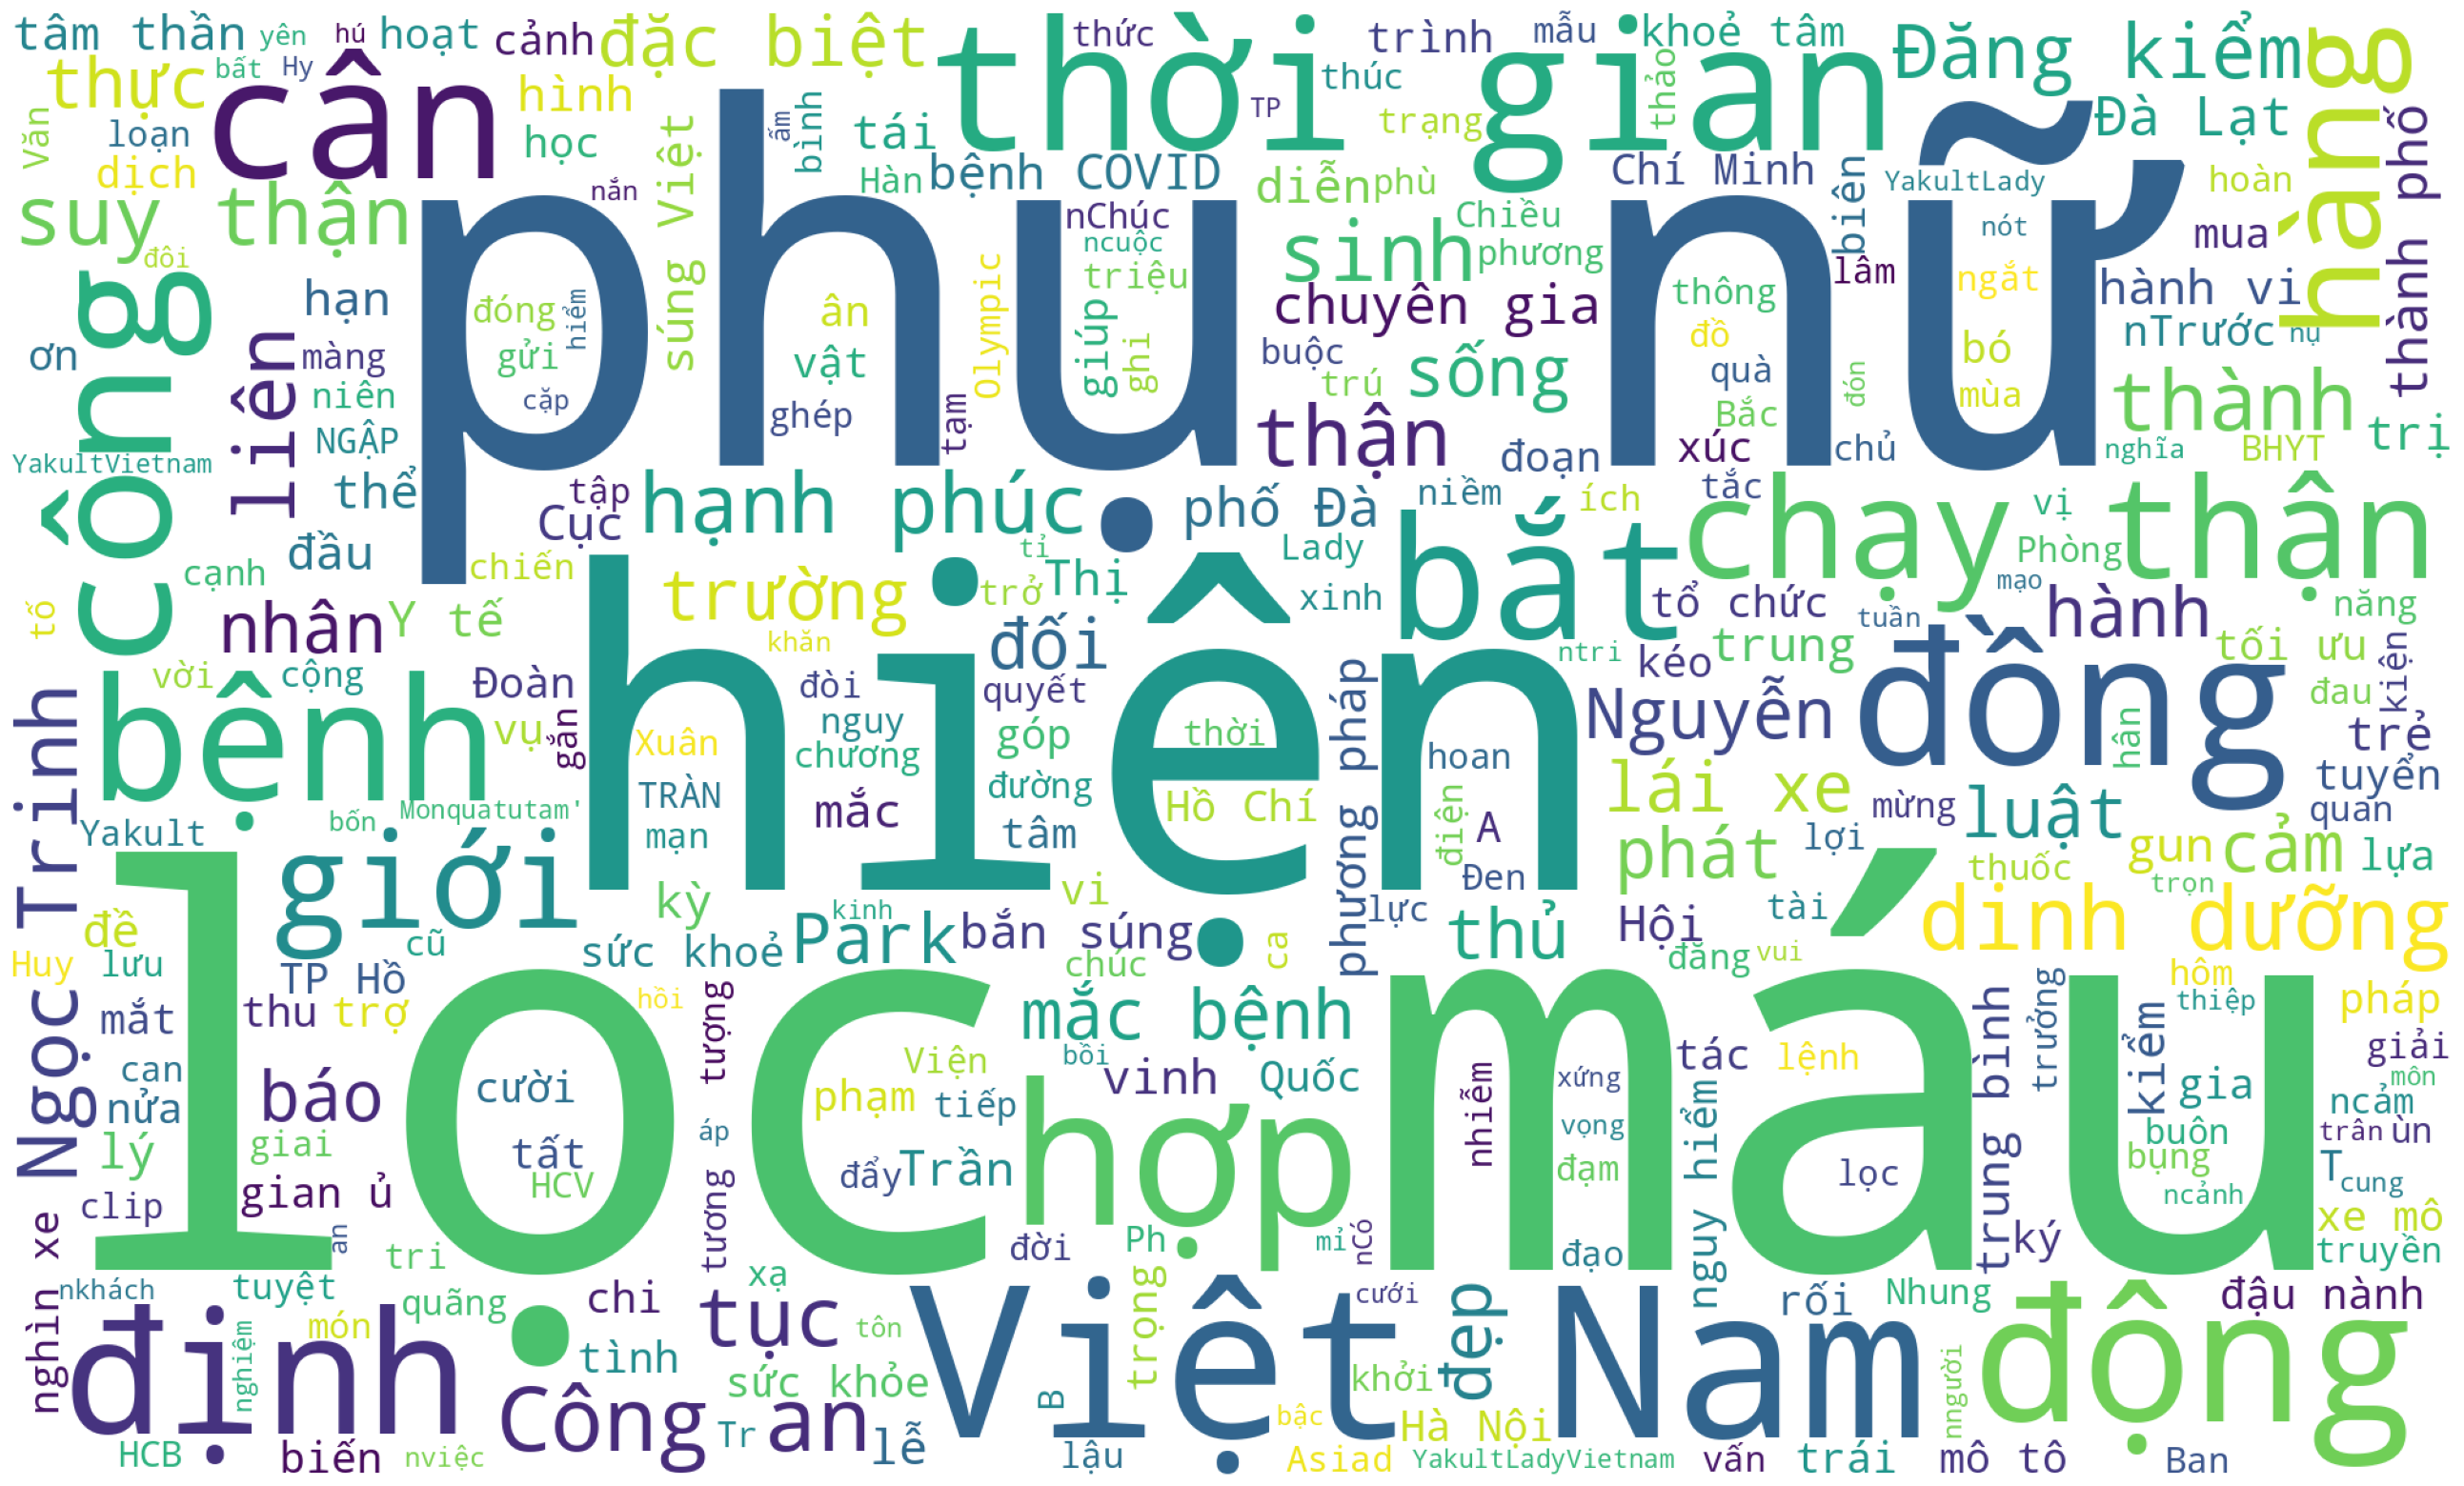

In [401]:
df_text = women_df[['id','text']]
text = (df_text['text']).tolist()

STOPWORDS = pd.read_table('Data/stopword.txt', delimiter=', ')
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(str(text))
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [402]:
# Lấy thông tin về từ và tần suất xuất hiện
word_freq = wordcloud.words_

# Sắp xếp theo tần suất giảm dần
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# In ra top 20 từ khóa
for word, freq in sorted_word_freq[:20]:
    print(f"{word}: {freq}")

lọc máu: 1.0
phụ nữ: 0.8
hiện: 0.7
Việt Nam: 0.6
hợp: 0.5
động: 0.45
đồng: 0.45
thời gian: 0.45
công: 0.4
bệnh: 0.4
bắt: 0.4
cân: 0.4
định: 0.4
chạy thận: 0.4
giới: 0.35
hàng: 0.35
dinh dưỡng: 0.35
Công an: 0.35
thận: 0.3
liên: 0.3


## Dự đoán

Mean Absolute Error: 2267.853046594982


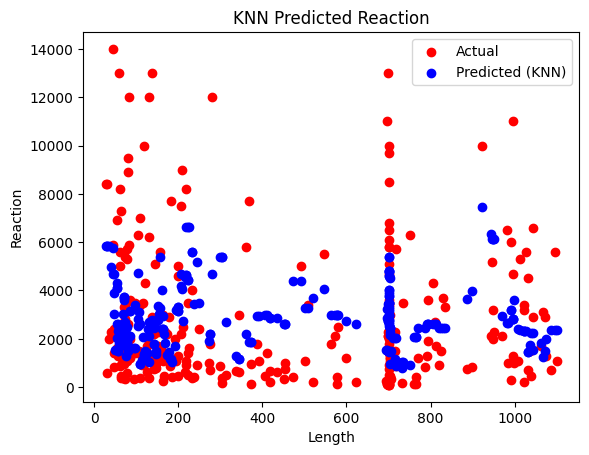

In [429]:
clean_df = clean_df[clean_df['reaction']<20000]
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = clean_df[['len', 'hour', 'media']]
y = clean_df['reaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Tạo và huấn luyện mô hình K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed
knn_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_knn = knn_model.predict(X_test)

# Đánh giá mô hình bằng cách tính Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_knn)
print(f'Mean Absolute Error: {mae}')


# Hiển thị dự đoán và thực tế trên tập kiểm tra
plt.scatter(X_test['len'], y_test, color='red', label='Actual')
plt.scatter(X_test['len'], y_pred_knn, color='blue', label='Predicted (KNN)')
plt.xlabel('Length')
plt.ylabel('Reaction')
plt.legend()
plt.title('KNN Predicted Reaction')
plt.show()